In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

#the above imports the plotting library matplotlib

In [2]:
#other useful imports we've seen before

import h5py
import numpy as np
import math

In [3]:
#import scipy.stats package 
import scipy.stats as stats

## Finding some interesting neurons 

In [4]:
#ok let's load the data 
DATA_PATH = "/Users/poldrack/data_unsynced/psych253/ventral_neural_data.hdf5"
Ventral_Dataset = h5py.File(DATA_PATH)

/Users/poldrack/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
#useful utility function for plotting HDF5 dimension labels
def dimnames(dataset):
    dims = dataset.dims  #get the dimension object
    dimlist = [x.label for x in dims.keys()]  #get the label attribute
    dimlist = map(str, dimlist)  #cast everything to string instead of "unicode" ... complicated rathole ... not strictly necessary
    return dimlist

In [6]:
#let's get the IT neural data -- time and trial averaged
Neural_Data = Ventral_Dataset['time_averaged_trial_averaged']
IT_NEURONS = Ventral_Dataset['neural_meta']['IT_NEURONS']
IT_Neural_Data = Neural_Data[:, IT_NEURONS]

#... and remind ourselves of the tensor shape
print('Shape:', IT_Neural_Data.shape)
print('Dimensions:', dimnames(Neural_Data))
#right, 5760 images and 168 neurons

Shape: (5760, 168)
Dimensions: <map object at 0x11abc9690>


In [7]:
#ok just like last time it was useful to sort by category 
#so this code is a copy from last time
categories = Ventral_Dataset['image_meta']['category'][:]   #array of category labels for all images  --> shape == (5760,)
unique_categories = np.unique(categories)                #array of unique category labels --> shape == (8,)
objects = Ventral_Dataset['image_meta']['object_name'][:]   #array of object labels for all images --> shape == (5670,)
unique_objects = np.unique(objects)                      #array of unique object labels --> shape == (64,) 
objects_by_category = {c: np.unique(objects[categories == c]) 
                       for c in unique_categories}
objects_sorted_by_categories = np.concatenate([objects_by_category[c] for c in unique_categories])


In [8]:
objects_sorted_by_categories

array([b'ELEPHANT_M', b'GORILLA', b'LIONESS', b'TURTLE_L', b'bear',
       b'blCow', b'breed_pug', b'hedgehog', b'BAHRAIN', b'CGTG_L',
       b'DTUG_L', b'MQUEEN_L', b'SISTER_L', b'cruiser', b'motoryacht',
       b'support', b'Beetle', b'alfa155', b'astra', b'bmw325', b'bora_a',
       b'celica', b'clio', b'z3', b'_001', b'_004', b'_008', b'_010',
       b'_011', b'_014', b'_031', b'_033', b'face0001', b'face0002',
       b'face0003', b'face0004', b'face0005', b'face0006', b'face0007',
       b'face0008', b'Apple_Fruit_obj', b'Apricot_obj', b'Peach_obj',
       b'Pear_obj', b'Strawberry_obj', b'raspberry_obj', b'walnut_obj',
       b'watermelon_obj', b'_01_Airliner_2jetEngines', b'_05_future',
       b'_19_flyingBoat', b'f16', b'junkers88', b'mig29', b'rdbarren',
       b'sopwith', b'_08', b'_10', b'_11', b'_12', b'_18', b'_37', b'_38',
       b'_44'], dtype='|S24')

In [46]:
#Now, we're interested in looking at some responses in closer detail
#let's plot some neuron's responses, averaged over all images of a given object
#on a per variation level basis
var_level = Ventral_Dataset['image_meta']['variation_level'][:]
unique_var_levels = np.unique(var_level)

sorted_IT_Neural_Data_means = np.array([IT_Neural_Data[(var_level == v) & (objects == o)].mean(0)
                                        for c in unique_categories
                                        for v in unique_var_levels 
                                        for o in objects_by_category[c]
                                        ])

In [47]:
sorted_IT_Neural_Data_means.shape

(192, 168)

Text(0.5, 1.0, 'This is NOT ordered by time')

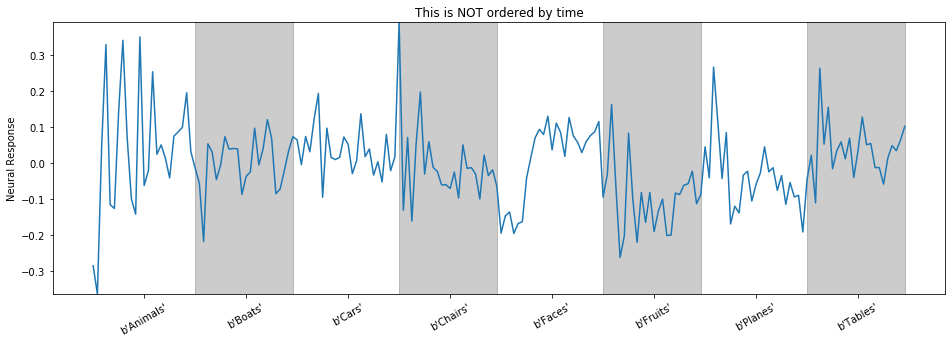

In [48]:
plt.figure(figsize=(16, 5))
neuron_ind = 0
neuron_i_data = sorted_IT_Neural_Data_means[:, neuron_ind]
minval = neuron_i_data.min()
maxval = neuron_i_data.max()
plt.plot(neuron_i_data)
plt.fill_between(np.arange(192), minval, maxval, 
                 where=(np.floor(np.arange(192) / 24) % 2).astype(bool), color='k', alpha=0.2)
plt.xticks(np.arange(0, 192, 24) + 12, unique_categories, rotation=30);
plt.ylabel('Neural Response')
plt.ylim(minval, maxval)

#ok, well the 0th (first) neuron doesn't look that easy to interpret .... 
plt.title('This is NOT ordered by time')

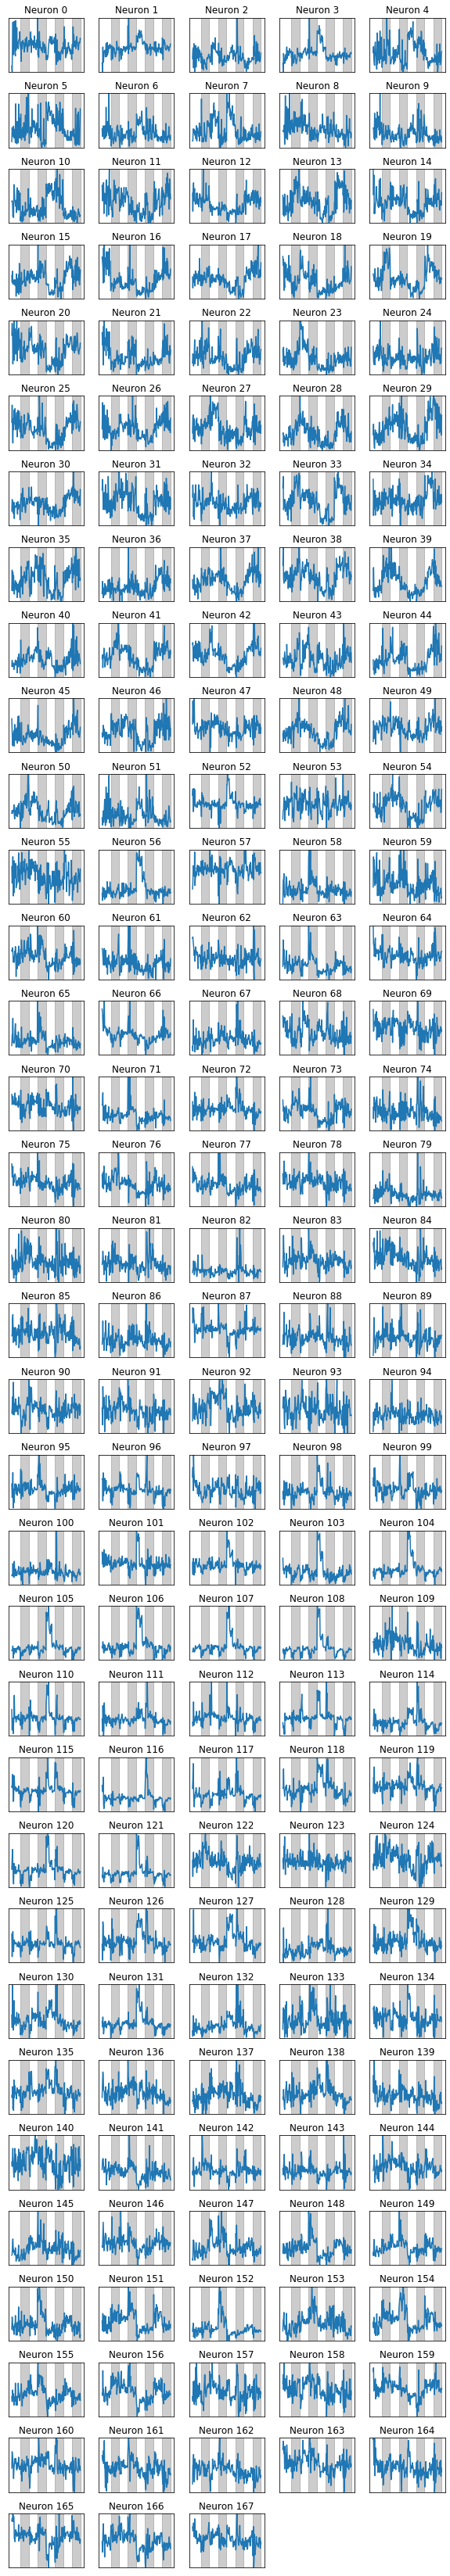

In [49]:
#but wait, let's plot *all* the IT neurons responses
plt.figure(figsize=(10, 60))
for neuron_ind in range(168):
    plt.subplot(34, 5, neuron_ind + 1)
    neuron_i_data = sorted_IT_Neural_Data_means[:, neuron_ind]
    minval = neuron_i_data.min()
    maxval = neuron_i_data.max()
    plt.plot(neuron_i_data)
    plt.fill_between(np.arange(192), minval, maxval, 
                     where=(np.floor(np.arange(192) / 24) % 2).astype(bool), color='k', alpha=0.2)
    plt.xticks([]); plt.yticks([])
    plt.title('Neuron %d' % neuron_ind)
    plt.ylim(minval, maxval)
plt.subplots_adjust(hspace=0.4)

#hey what's going on with neurons 101-108 --- the seem to really like Faces!

(-0.27882752, 0.9149305)

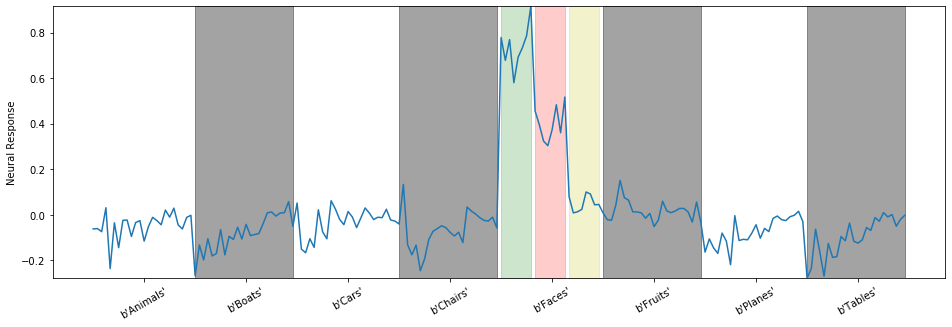

In [24]:
#let's look at one of these more closely.

neuron_ind = 105
plt.figure(figsize=(16, 5))
neuron_i_data = sorted_IT_Neural_Data_means[:, neuron_ind]
minval = neuron_i_data.min()
maxval = neuron_i_data.max()
plt.plot(neuron_i_data)
plt.fill_between(np.arange(192), minval, maxval, 
                 where=(np.floor(np.arange(192) / 24) % 2).astype(bool), color='k', alpha=0.2)
plt.fill_between(np.arange(192), minval, maxval, 
                 where=(np.floor(np.arange(192) / 24) % 2).astype(bool), color='k', alpha=0.2)
plt.fill_between(np.arange(192), minval, maxval, 
                 where=(np.arange(192) >= 4 * 24) & (np.arange(192) < 4 * 24 + 8), color='g', alpha=0.2)
plt.fill_between(np.arange(192), minval, maxval, 
                 where=(np.arange(192) >= 4 * 24 + 8) & (np.arange(192) < 4 * 24 + 16), color='r', alpha=0.2)
plt.fill_between(np.arange(192), minval, maxval, 
                 where=(np.arange(192) >= 4 * 24 + 16) & (np.arange(192) < 5 * 24), color='y', alpha=0.2)
plt.xticks(np.arange(0, 192, 24) + 12, unique_categories, rotation=30);
plt.ylabel('Neural Response')
plt.ylim(minval, maxval)

#remember -- sorted by category and then by variation level 
#there are 8 objects per category and 3 variation levels
#so that means each category block below has 24 points
#so we're seeing the neuron respond well to faces at low & medium variation 
#(the first (in green) and second (in red) miniblocks of eight points within the 5th block of 24) 
#but it is much less responsive to high variation faces (the third miniblock of 8 in yellow)

## Pairwise Reliability Analysis

In [50]:
#Let's look at the data 
by_trial_IT_Neural_Data_objmeans_sorted_by_category = {}
for vl in unique_var_levels:
    level_number = vl.decode("utf-8")[-1]
    arr = Ventral_Dataset['time_averaged']['variation_level_%s' % level_number][:, :, IT_NEURONS]
    objects_at_var_level = objects[var_level == vl]
    arr1 = np.array([arr[:, objects_at_var_level == o].mean(1) for o in objects_sorted_by_categories])
    by_trial_IT_Neural_Data_objmeans_sorted_by_category[vl] = arr1


In [52]:
#so for each variation level, this dictionary has stuff of shape 
#(num_objects, num_trials_at_this_variation_level, num_IT_neurons)
by_trial_IT_Neural_Data_objmeans_sorted_by_category[b'V0'].shape

(64, 28, 168)

In [53]:
by_trial_IT_Neural_Data_objmeans_sorted_by_category[b'V3'].shape

(64, 51, 168)

In [56]:
def plot_various_trial_analyses(neuron_ind, var_level):
    plt.figure(figsize=(16, 5))
    
    #the first thing we want to do is just plot the data average
    #so first get the data for all trials
    neuron_i_data_by_trial = by_trial_IT_Neural_Data_objmeans_sorted_by_category[var_level][:, :, neuron_ind]
    #now take the mean over the second dimension -- the trial dimension
    neuron_i_data_trial_mean = neuron_i_data_by_trial.mean(1)
    #for convenience, let's compute the min and max values of the neural response
    minval = neuron_i_data_trial_mean.min()
    maxval = neuron_i_data_trial_mean.max()
    #now let's plot the responses across objects
    plt.plot(neuron_i_data_trial_mean)
    #and block stuff to make the categories easier to see
    plt.fill_between(np.arange(64), minval, maxval, 
                     where=(np.floor(np.arange(64) / 8) % 2).astype(bool), color='k', alpha=0.2)
    plt.xticks(np.arange(0, 64, 8) + 4, unique_categories, rotation=30);
    plt.ylabel('Neural Response of neuron %d' % neuron_ind)
    plt.ylim(minval, maxval)
    plt.xlabel('Responses for Variation %s images' % var_level)

    #now let's look at two trials -- the first and 6th ones, for example 
    t1 = 0; t2 = 5
    t1_data = neuron_i_data_by_trial[:, t1]
    t2_data = neuron_i_data_by_trial[:, t2]
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(t1_data)
    plt.xticks(np.arange(0, 64, 8), unique_categories, rotation=30);
    plt.title('Neuron %d, trial %d, var %s' % (neuron_ind, t1, var_level))
    plt.subplot(1, 2, 2)
    plt.plot(t2_data)
    plt.xticks(np.arange(0, 64, 8), unique_categories, rotation=30);
    plt.title('Neuron %d, trial %d, var %s' % (neuron_ind, t2, var_level))

    #let's do a scatter plot of the responses to one trial vs the other
    plt.figure()
    plt.scatter(t1_data, t2_data)
    plt.xlabel('responses of neuron %d, trial %d, %s'% (neuron_ind, t1, var_level))
    plt.ylabel('responses of neuron %d, trial %d, %s'% (neuron_ind, t2, var_level))

    #how correlated are they exactly between trials? let's use pearson correlation
    rval = stats.pearsonr(t1_data, t2_data)[0]
    plt.title('Correlation for varlevel %s images = %.3f' % (var_level, rval))

    #in fact, let's have a look at the correlation for all pairs of trials 
    fig = plt.figure(figsize = (7, 7))
    #the numpy corrcoef function basically gets the pairwise pearson correlation efficiently
    corrs = np.corrcoef(neuron_i_data_by_trial.T)
    #now let's plot the matrix of correlations using the matshow function
    plt.colorbar(fig.gca().matshow(corrs))
    plt.xlabel('trials of neuron %d' % neuron_ind)
    plt.ylabel('trials of neuron %d' % neuron_ind)
    plt.title('Between-trial correlations for varlevel %s' % var_level)


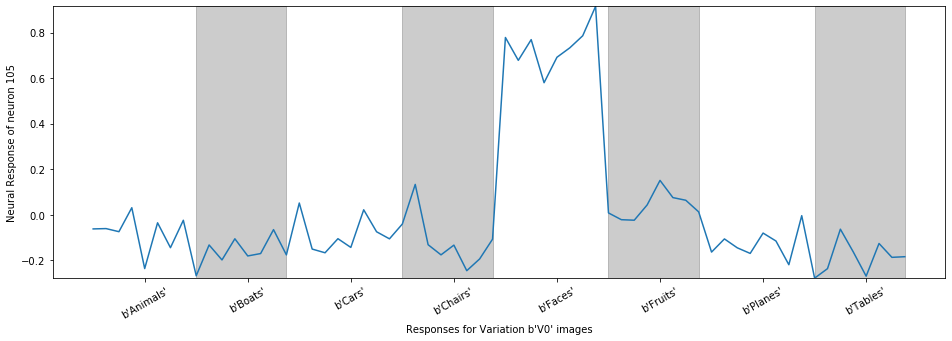

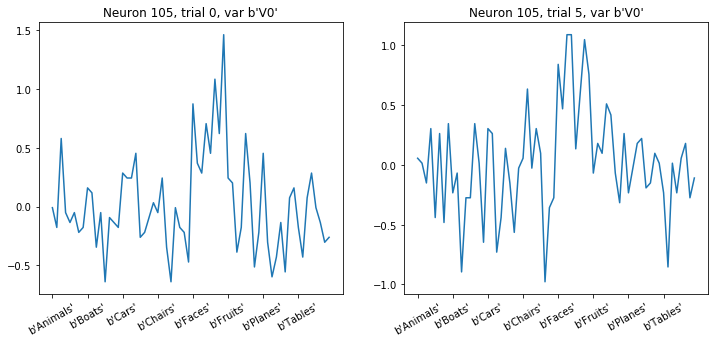

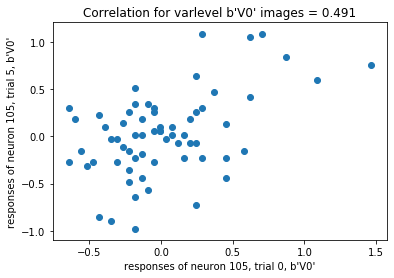

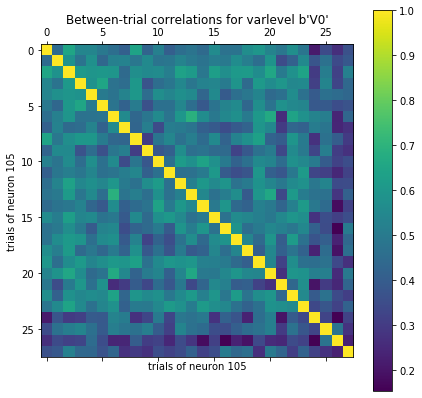

In [57]:
#ok let's use our analysis tool for Variation 0 images of neuron 105
plot_various_trial_analyses(105, b'V0')
#basically we find that the neuron definitely likes faces and is pretty correlated between trials  
#at this variation level

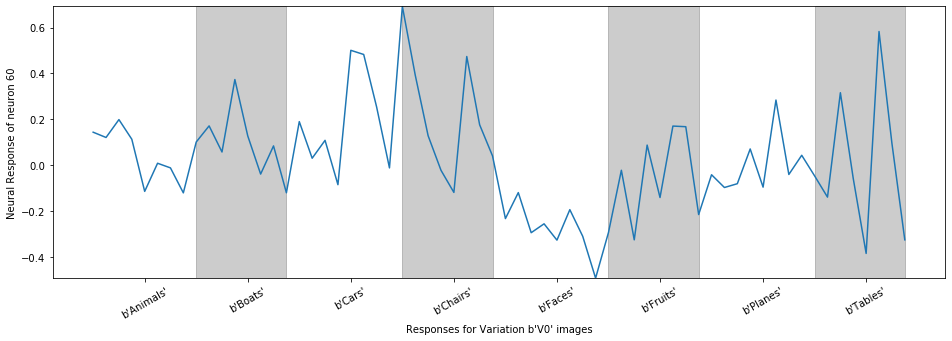

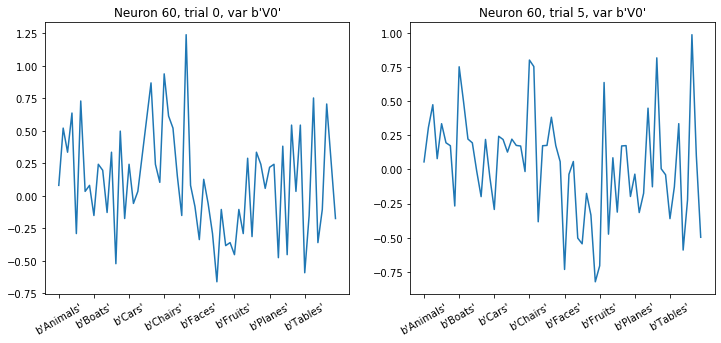

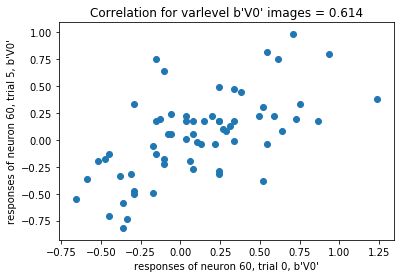

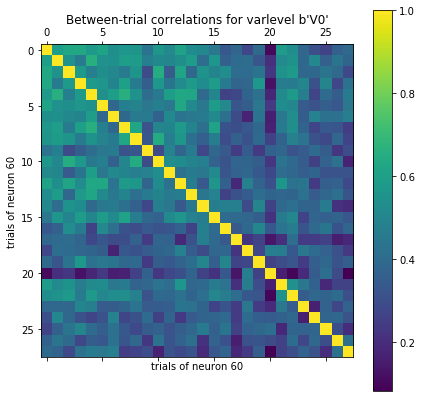

In [58]:
#neuron 60 has a more complex pattern -- maybe it's sorta anti-faces
plot_various_trial_analyses(60, b'V0')
#but also quite self-consistent between trials

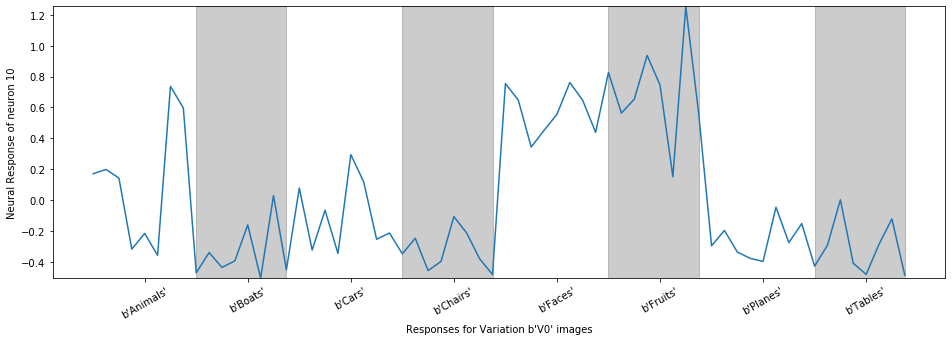

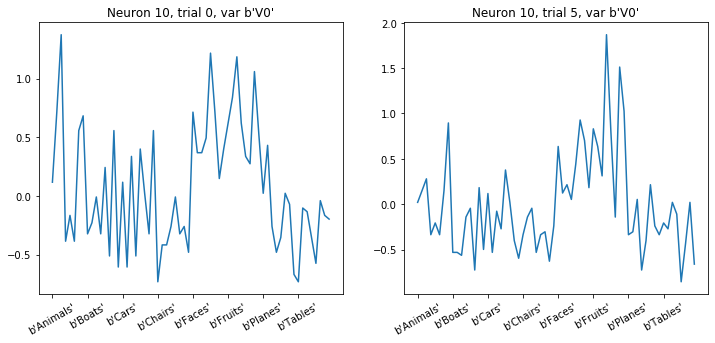

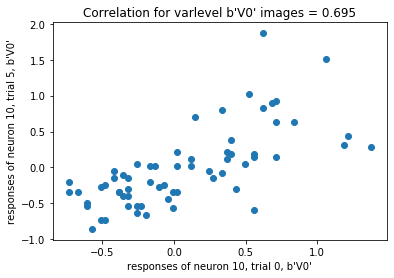

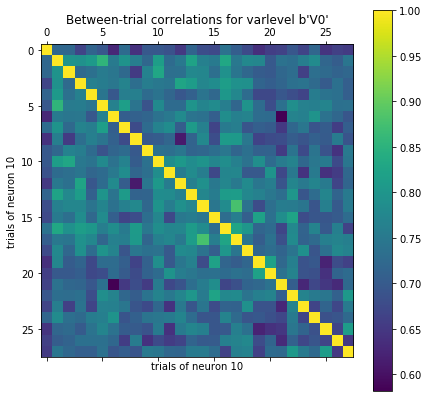

In [59]:
#perhaps neuron 10 is a "round thing" detector?  
plot_various_trial_analyses(10, b'V0')

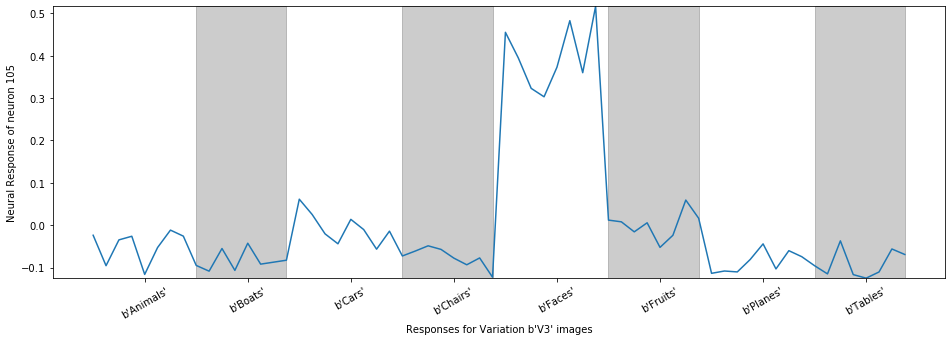

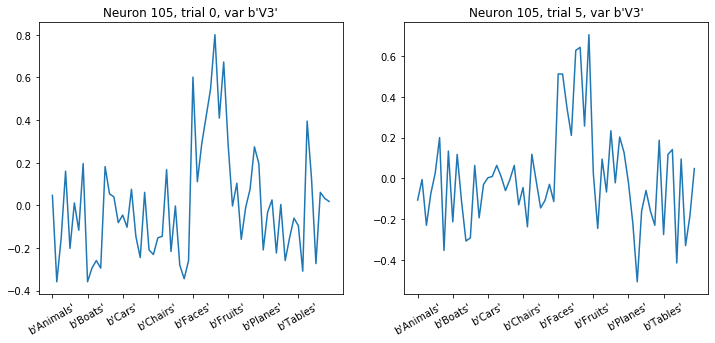

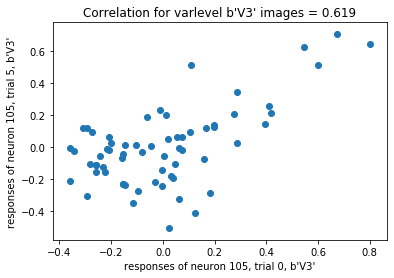

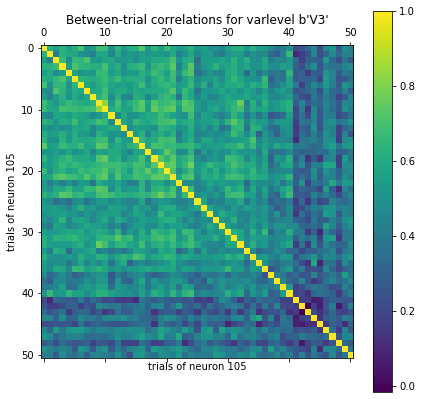

In [60]:
#neuron 105 is still pretty consistently face-liking at medium variation
plot_various_trial_analyses(105, b'V3')

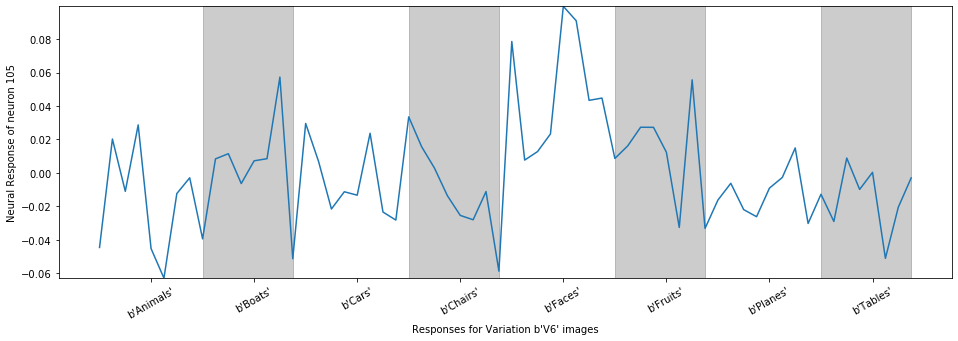

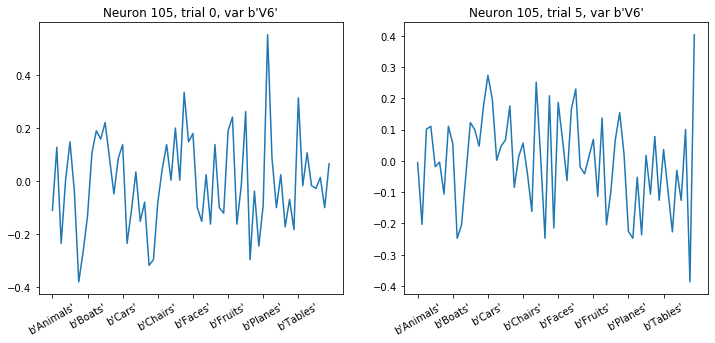

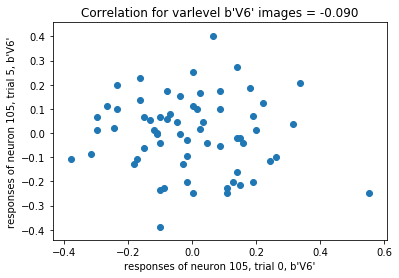

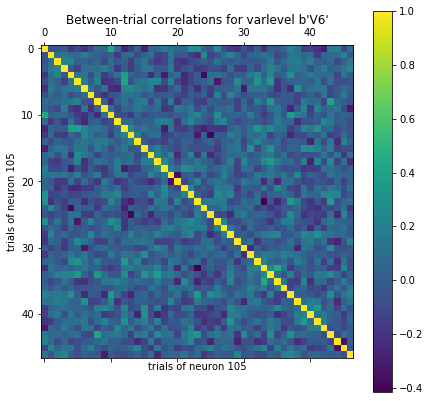

In [61]:
#but things get much murkier at high variation 
plot_various_trial_analyses(105, b'V6')

In [62]:
#this makes us curious to look at standard deviations of responses across trials
def plot_trial_avg_data_with_stds(neuron_ind, var_level):
    
    neuron_i_data_by_trial = by_trial_IT_Neural_Data_objmeans_sorted_by_category[var_level][:, :, neuron_ind]
    neuron_i_data_trial_mean = neuron_i_data_by_trial.mean(1)
    neuron_i_data_trial_std = neuron_i_data_by_trial.std(1)
    minval = neuron_i_data_trial_mean.min()
    maxval = neuron_i_data_trial_mean.max()
    plt.plot(neuron_i_data_trial_mean)
    plt.fill_between(np.arange(64), minval, maxval, 
                     where=(np.floor(np.arange(64) / 8) % 2).astype(bool), color='k', alpha=0.2)

    plt.fill_between(np.arange(64), 
                     neuron_i_data_trial_mean - neuron_i_data_trial_std,
                     neuron_i_data_trial_mean + neuron_i_data_trial_std,
                     color='b', alpha=0.2)

    plt.xticks(np.arange(0, 64, 8) + 4, unique_categories, rotation=30);
    plt.ylabel('Neural Responses')
    plt.ylim(minval, maxval)
    plt.title('Responses for neuron %d Variation %s images' % (neuron_ind, var_level))
    plt.xlim(0, 64)

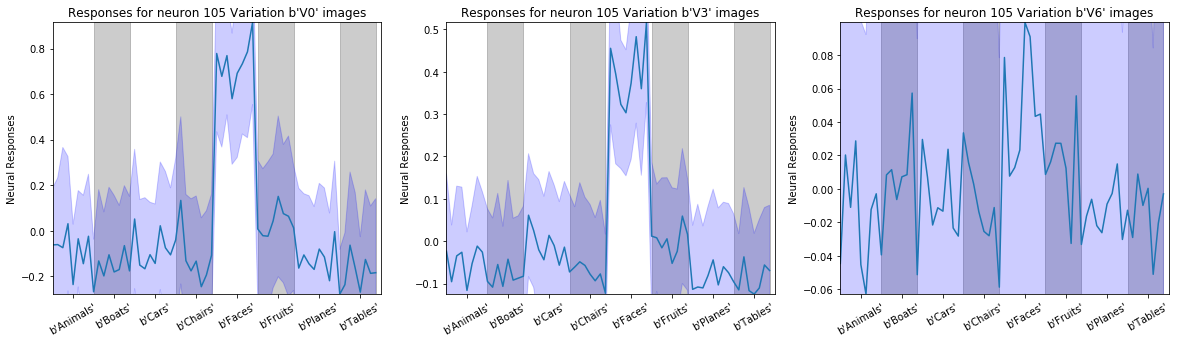

In [64]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plot_trial_avg_data_with_stds(105, b'V0')
plt.subplot(1, 3, 2)
plot_trial_avg_data_with_stds(105, b'V3')
plt.subplot(1, 3, 3)
plot_trial_avg_data_with_stds(105, b'V6')

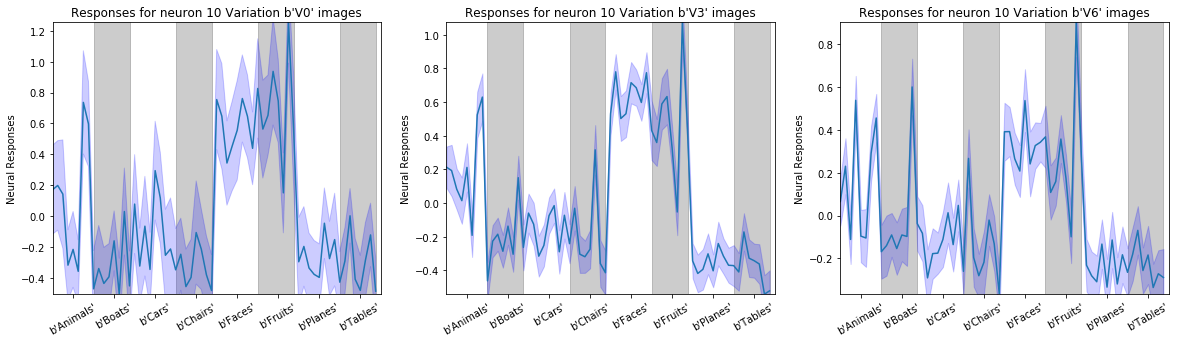

In [66]:
#Unlike our putative face neuron, this "round thing" detector is pretty consistent at high variability
#which is reasonable semantically -- round things are still round from many object angles
#but faces are really hard to recognize from extremely weird angles as seen in the high variation condition
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plot_trial_avg_data_with_stds(10, b'V0')
plt.subplot(1, 3, 2)
plot_trial_avg_data_with_stds(10, b'V3')
plt.subplot(1, 3, 3)
plot_trial_avg_data_with_stds(10, b'V6')

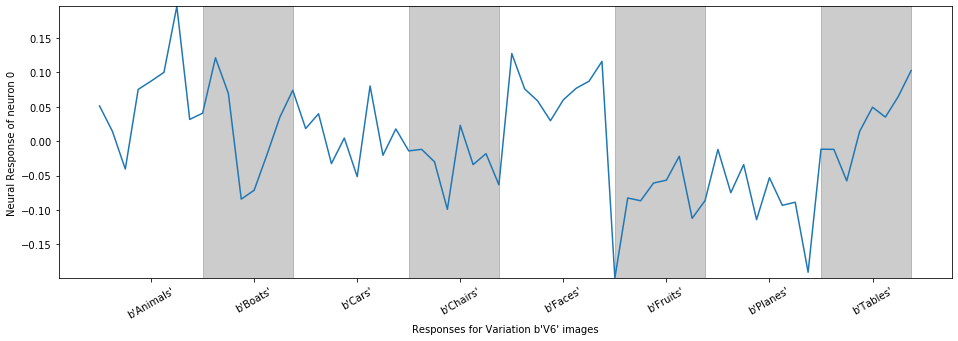

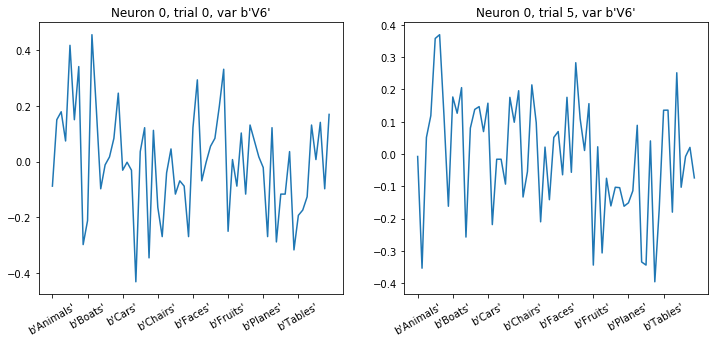

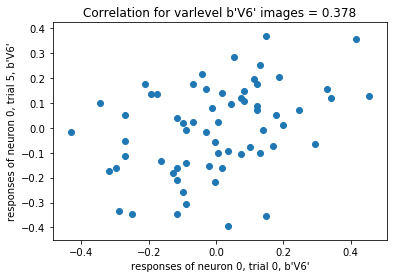

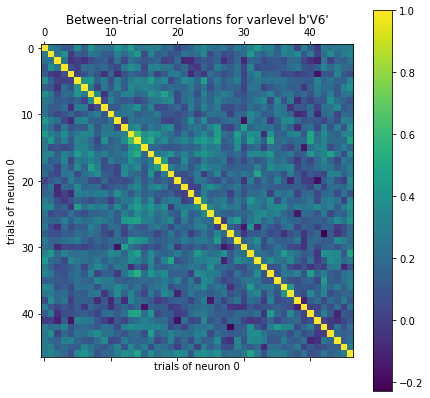

In [67]:
#neuron 0 seems to sort of be in an intermediate situation 
#-- somewhat but not incredibly reliable responses at high variation
plot_various_trial_analyses(0, b'V6')

## Split-Half Reliability

In [68]:
import scipy.stats as stats

Text(0.5, 1.0, "Varlevel b'V6' correlation with 47 trials: 0.848, neuron 0")

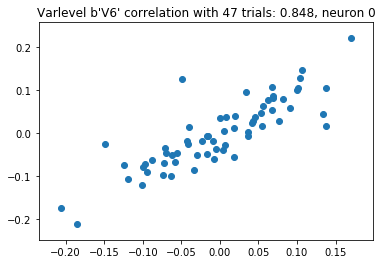

In [71]:
#but wait -- we've only really been looking at *pairs* of trials
#do we can more reliable results if we average over groups of trials?

neuron_ind = 0
vl = b'V6'
#let's measure the number of trials
num_trials = by_trial_IT_Neural_Data_objmeans_sorted_by_category[vl].shape[1]

#then compute the average of the neuron's responses in the first and second half of trials
first_half_trial_mean = by_trial_IT_Neural_Data_objmeans_sorted_by_category[vl][:, :int(num_trials/2), neuron_ind].mean(1)
second_half_trial_mean = by_trial_IT_Neural_Data_objmeans_sorted_by_category[vl][:, int(num_trials/2):, neuron_ind].mean(1)

#plot the first and second half vs each other
plt.scatter(first_half_trial_mean, second_half_trial_mean)

#.... and measure and report their correlation
corrval = stats.pearsonr(first_half_trial_mean, second_half_trial_mean)[0]
plt.title('Varlevel %s correlation with %d trials: %.3f, neuron %d' % (vl, num_trials, corrval, neuron_ind))

#much higher here with more trials

In [76]:
#here's a very simple implementation of split-half reliability
#this is a NON-boostrapping version

def get_correlation(data_by_trial, num_trials, num_splits):
    """arguments:
          data_by_trial -- (numpy array) the data
             assumes a tensor with structure is (stimuli, trials)
             
          num_trials -- (nonnegative integer) how many trials to consider
          
          num_splits (nonnegative integer) how many splits of the data to make
          
       returns:
          array of length num_splits
    """

    
    #get total number of trials
    num_total_trials = data_by_trial.shape[1]
    
    #you better not ask for more trials than you actually have
    assert num_trials <= num_total_trials, "You asked for %d trials but there's only %d" % (num_trials, num_total_trials)
    
    #we want to make sure that while we select groups of trials basically randomly,
    #that we can still exactly reproduce our results later
    #so to do this, we use a constructed random number generator to select trial groups
    #and seed the generator with seed = 0 (could be any non-negative integer, but the seed
    #*must* be set for this to be reproducible
    random_number_generator = np.random.RandomState(seed=0)

    corrvals = []
    for split_index in range(num_splits):
        #construct a new permutation of the trial indices
        perm =  random_number_generator.permutation(num_total_trials)
    
        #take the first num_trials/2 and second num_trials/2 pieces of the data
        first_half_of_trial_indices = perm[:int(num_trials / 2)]
        second_half_of_trial_indices = perm[int(num_trials / 2): num_trials]
        
        #mean over trial dimension
        mean_first_half_of_trials = data_by_trial[:, first_half_of_trial_indices].mean(axis=1)
        mean_second_half_of_trials = data_by_trial[:, second_half_of_trial_indices].mean(axis=1)
        
        #compute the correlation between the means
        corrval = stats.pearsonr(mean_first_half_of_trials, 
                                 mean_second_half_of_trials)[0]
        #add to the list
        corrvals.append(corrval)
        
    return np.array(corrvals)

In [77]:
#to test our get_correlation function we want to work with the full IT
#not just the data averaged across all images within each object 
#so let's get a convenient data object for that

IT_Data_by_trial = {}
for vl in unique_var_levels:
    level_number = vl.decode("utf-8")[-1]
    arr = Ventral_Dataset['time_averaged']['variation_level_%s' % level_number][:, :, IT_NEURONS]
    IT_Data_by_trial[vl] = arr.swapaxes(0, 1)

In [78]:
#ok so first we want to know, for a given number of trials, how many splits do we need to compute to
#get a reliable estimate of the mean tendency of the correlation with that many splits? 
#let's first look at 2 splits 

neuron_ind = 0
vl = b'V6'

num_trials = 10
num_splits = 2

corrvals = get_correlation(IT_Data_by_trial[vl][:, :, neuron_ind], 
                           num_trials, 
                           num_splits)

print(corrvals)
print('mean --> %.3f' % corrvals.mean())
print('standard error of mean --> %.3f' % (corrvals.std() / np.sqrt(num_splits)))

[0.26888575 0.26218287]
mean --> 0.266
standard error of mean --> 0.002


In [79]:
#... and now at 500 splits
neuron_ind = 0
vl = b'V6'

num_trials = 10
num_splits = 500

corrvals = get_correlation(IT_Data_by_trial[vl][:, :, neuron_ind], 
                           num_trials, 
                           num_splits)

print('mean --> %.3f' % corrvals.mean())
print('standard error of mean --> %.3f' % (corrvals.std() / np.sqrt(num_splits)))

mean --> 0.268
standard error of mean --> 0.001


(-1, 513)

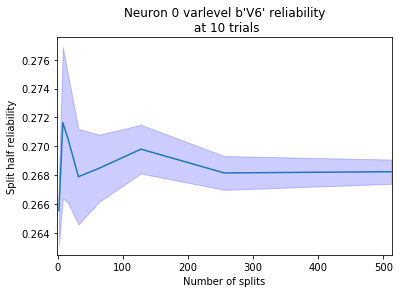

In [80]:
#in fact, let's plot reliability estimate and the SEM as a function of the number of splits
#... first for 10 trials

neuron_ind = 0
vl = b'V6'

num_trials = 10

means = []
sems = []

num_splits = [2, 8, 16, 32, 64, 128, 256, 512]
for ns in num_splits:
    cs = get_correlation(IT_Data_by_trial[vl][:, :, neuron_ind],
                           num_trials, 
                           ns)
    mean = cs.mean()
    means.append(mean)
    sem = cs.std() / np.sqrt(ns)
    sems.append(sem)
    
means = np.array(means)
sems = np.array(sems)

plt.plot(num_splits, means)
plt.fill_between(num_splits, means - sems, means + sems, color='b', alpha = 0.2)
plt.xlabel('Number of splits')
plt.ylabel('Split half reliability')
plt.title('Neuron %d varlevel %s reliability\n at 10 trials' % (neuron_ind, vl))
plt.xlim(-1, 513)

(-1, 513)

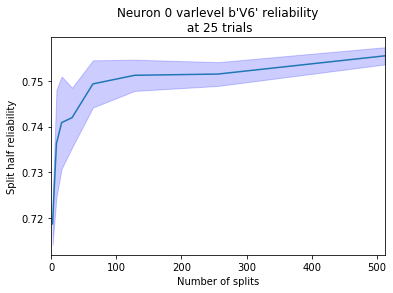

In [81]:
#... now for 25 trials
neuron_ind = 0
vl = b'V6'

num_trials = 25

means = []
sems = []

num_splits = [2, 8, 16, 32, 64, 128, 256, 512]
for ns in num_splits:
    cs = get_correlation(by_trial_IT_Neural_Data_objmeans_sorted_by_category[vl][:, :, neuron_ind], 
                           num_trials, 
                           ns)
    mean = cs.mean()
    means.append(mean)
    sem = cs.std() / np.sqrt(ns)
    sems.append(sem)
    
means = np.array(means)
sems = np.array(sems)

plt.plot(num_splits, means)
plt.fill_between(num_splits, means - sems, means + sems, color='b', alpha = 0.2)
plt.xlabel('Number of splits')
plt.ylabel('Split half reliability')
plt.title('Neuron %d varlevel %s reliability\n at %d trials' % (neuron_ind, vl, num_trials))
plt.xlim(-1, 513)

#conclusion:  it looks like having num_splits ~ 10 * num_trials is good enough

In [82]:
#ok so now let's look at reliability as a function of number of trials

def get_reliability_curve(data):
    """
    This is a convenience function that plots reliability as a function of number of trials for some data
    
    arguments:
       data -- (numpy array) of shape (stimuli, trials)
    
    """
    means = []
    sems = []

    #determine the total number of trials
    total_num_trials = data.shape[1]
    
    #we'll evaluate reliability for each number of trials betwee 2 and the total, 
    #in intervals of 3
    num_trials = range(2, total_num_trials, 3)
    for nt in num_trials:
        ns = 10 * nt
        cs = get_correlation(data,
                               nt, 
                               ns)
        mean = cs.mean()
        means.append(mean)
        sem = cs.std() / np.sqrt(ns)
        sems.append(sem)

    means = np.array(means)
    sems = np.array(sems)

    ln = plt.plot(num_trials, means)[0]  #this "ln" thing is a matplotlib thing -- usefor for making legens (see below)
    plt.fill_between(num_trials, means - sems, means + sems, color='b', alpha = 0.2)

    plt.xlabel('Number of Trials')
    plt.ylabel('Mean correlation')
    
    return ln

Text(0.5, 1.0, "Reliability curve for neuron 0, varlevel b'V6'")

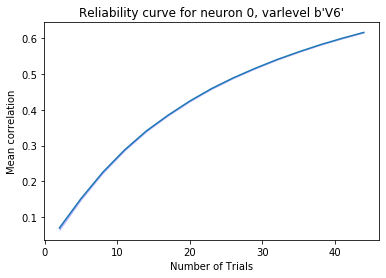

In [83]:
#so we see that, not unexpectedly, reliability increases at a function of number of trials

neuron_ind = 0
vl = b'V6'
get_reliability_curve(IT_Data_by_trial[vl][:, :, neuron_ind]);

plt.title('Reliability curve for neuron %d, varlevel %s' % (neuron_ind, vl))


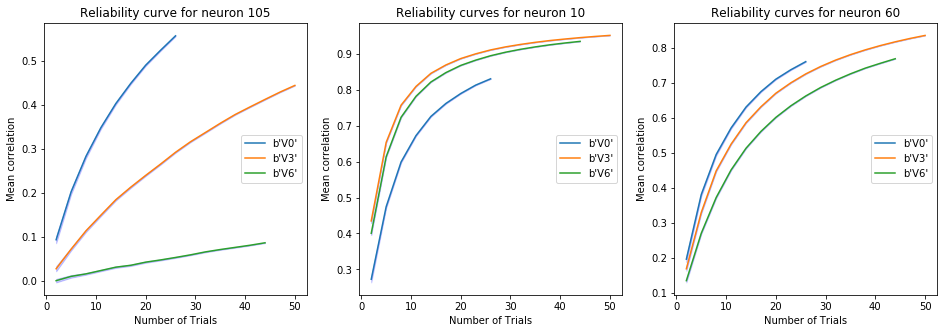

In [84]:
#but what is interesting is that reliability is different across different variation levels
#and the pattern between this is different for different neurons

plt.figure(figsize = (16, 5))

plt.subplot(1, 3, 1)
neuron_ind = 105

lns = []
for vl in unique_var_levels:
    ln = get_reliability_curve(IT_Data_by_trial[vl][:, :, neuron_ind])
    lns.append(ln)

plt.title('Reliability curve for neuron %d' % neuron_ind)
plt.legend(lns, unique_var_levels, loc='center right')

plt.subplot(1, 3, 2)
neuron_ind = 10
lns = []
for vl in unique_var_levels:
    ln = get_reliability_curve(IT_Data_by_trial[vl][:, :, neuron_ind])
    lns.append(ln)

plt.title('Reliability curves for neuron %d' % neuron_ind)
plt.legend(lns, unique_var_levels, loc='center right')


plt.subplot(1, 3, 3)
neuron_ind = 60
lns = []
for vl in unique_var_levels:
    ln = get_reliability_curve(IT_Data_by_trial[vl][:, :, neuron_ind])
    lns.append(ln)

plt.title('Reliability curves for neuron %d' % neuron_ind)
plt.legend(lns, unique_var_levels, loc='center right')

## Spearman-Brown Prophecy Formula

In [51]:
#put in sb correction comparing var levels 

In [85]:
def spearman_brown(uncorrected, multiple):
    numerator = multiple * uncorrected
    denominator = 1 + (multiple - 1) * uncorrected
    return numerator / denominator

In [86]:
#ok so now let's look at reliability as a function of number of trials

def get_reliability_curve_spearman_brown(data):
    """
    This is a convenience function that plots reliability as a function of number of trials for some data
    
    arguments:
       data -- (numpy array) of shape (stimuli, trials)
    
    """
    means = []
    sems = []
    corrected_means = []

    #determine the total number of trials
    total_num_trials = data.shape[1]
    
    #we'll evaluate reliability for each number of trials betwee 2 and the total, in intervals of 3
    num_trials = range(2, total_num_trials, 3)
    for nt in num_trials:
        ns = 10 * nt
        cs = get_correlation(data,
                               nt, 
                               ns)
        mean = cs.mean()
        means.append(mean)
        sem = cs.std() / np.sqrt(ns)
        sems.append(sem)
        
        multiple = total_num_trials / float(nt) #have to do "float" here since python 2.x does integer division
        corrected_mean = spearman_brown(mean, multiple) 
        corrected_means.append(corrected_mean)
        
    means = np.array(means)
    sems = np.array(sems)
    corrected_means = np.array(corrected_means)
    
    ln = plt.plot(num_trials, means)[0]  #this "ln" thing is a matplotlib thing -- usefor for making legens (see below)
    plt.fill_between(num_trials, means - sems, means + sems, color='b', alpha = 0.2)
    
    ln_cor = plt.plot(num_trials, corrected_means)[0]

    plt.xlabel('Number of Trials')
    plt.ylabel('Mean correlation')
    
    return ln, ln_cor

Text(0.5, 1.0, "Reliability curve for neuron 0, varlevel b'V6'")

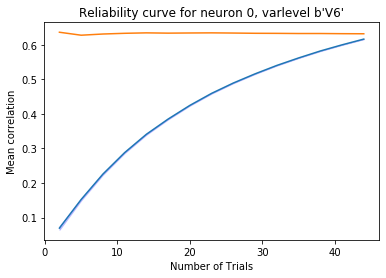

In [88]:
#ok the spearman-brown correction is a little bit of an overestimate here ...
#... but not bad
neuron_ind = 0
vl = b'V6'
get_reliability_curve_spearman_brown(IT_Data_by_trial[vl][:, :, neuron_ind]);

plt.title('Reliability curve for neuron %d, varlevel %s' % (neuron_ind, vl))



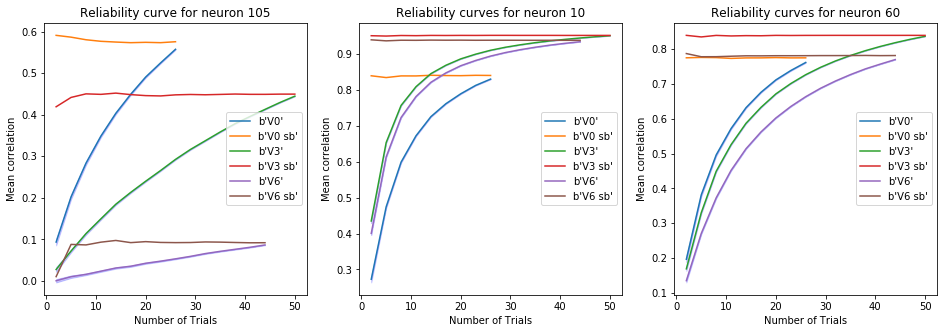

In [89]:
#in general the method works well  .... 

plt.figure(figsize = (16, 5))

plt.subplot(1, 3, 1)
neuron_ind = 105

lns = []
for vl in unique_var_levels:
    ln, ln_cor = get_reliability_curve_spearman_brown(IT_Data_by_trial[vl][:, :, neuron_ind])
    lns.extend([ln, ln_cor])

labels = [b'V0', b'V0 sb', b'V3', b'V3 sb', b'V6', b'V6 sb']
plt.title('Reliability curve for neuron %d' % neuron_ind)
plt.legend(lns, labels, loc='center right')

plt.subplot(1, 3, 2)
neuron_ind = 10
lns = []
for vl in unique_var_levels:
    ln, ln_cor = get_reliability_curve_spearman_brown(IT_Data_by_trial[vl][:, :, neuron_ind])
    lns.extend([ln, ln_cor])

plt.title('Reliability curves for neuron %d' % neuron_ind)
plt.legend(lns, labels, loc='center right')


plt.subplot(1, 3, 3)
neuron_ind = 60
lns = []
for vl in unique_var_levels:
    ln, ln_cor = get_reliability_curve_spearman_brown(IT_Data_by_trial[vl][:, :, neuron_ind])
    lns.extend([ln, ln_cor])

plt.title('Reliability curves for neuron %d' % neuron_ind)
plt.legend(lns, labels, loc='center right')

## Bootstrapping

In [90]:
#we'll use this convenience function for computing pairwise distances 
from scipy.spatial.distance import pdist
#e.g. correlations = 1 - correlation_distance
#and correlation_distance(X) = pdist(X, metri='correlation')

def averager(data):
    return np.mean(data, axis=0)

def get_bootstrap_sample(datalist, seed, aggregation_func=averager, sync=False):
    """this function gets one bootstrap sample 
       datalist = list of arrays of form 
             [(stimuli_group0, trials), (stimuli_group1, trials), ..., ]
       seed = integer seed for random number generator
       aggregation_func = callable that aggregates trial samples to single synthetic trial 
                            default is to just average over samples
       sync = boolean; whether to take trials synchronously (all samples for different stimuli
              from trials in the same session);
    """
    #create the random number generator
    rng = np.random.RandomState(seed=seed)
    
    synth_datalist = []
    #for each stimulus group:
    for data in datalist:
        num_trials = data.shape[1]
        #reconstruct data using the bootstrap idea for this stimulus group
        if sync:
            #if using the same trials for all stimulu, just get
            #a selection of trial numbers 
            selection = rng.randint(0, num_trials, size=(num_trials,))
            synth_data = data[:, selection].T
        else:
            #if using different trials for all stimuli, loop over trials ...
            synth_data = []
            num_stim = data.shape[0]
            for _ind in range(num_trials):
                #... and choose a different selection for each one
                selection = rng.randint(0, num_trials, size=(num_stim,))
                synth_sample = data[np.arange(num_stim), selection]
                synth_data.append(synth_sample)
        synth_data_meaned = aggregation_func(synth_data) #<-- this ends up being just a 1-D vector
        synth_datalist.append(synth_data_meaned)
        
    #concatenate results into sample for all stimulus groups
    synth_data_final = np.concatenate(synth_datalist)
    return synth_data_final


def get_bootstrap_correlation(num_iters, datalist, metric='correlation', sync=False):
    """this function calls the bootstrapping sampler a given number of times with different seeds
       returning the flattened list of pairwise distances bewteen samples for indicated distance metric
       
       num_iters = integer of how many bootstrapping samples we end up taking (should be >= 100)
       datalist = list of data arrays of form 
             [(stimuli_group0, trials), (stimuli_group1, trials), ..., ]
       metric = string, whatever type of way you want to compare the samples -- 
                by default this is "correlation", but could be anything acceptable to 
                the scipy.spatial.distance.pdist function, as specified here:
                    http://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html
    """
    synth_datas = []
    for _ind in range(num_iters):
        synth_data = get_bootstrap_sample(datalist, seed=_ind, sync=sync)
        synth_datas.append(synth_data)
    synth_datas = np.array(synth_datas)
    corrs = pdist(synth_datas, metric=metric)
    return np.mean(corrs), np.std(corrs)

In [91]:
num_iters = 100
metric = 'correlation'

corrs = []

neuron_ind = 0
datalist = [IT_Data_by_trial[vl][:, :, neuron_ind] for vl in unique_var_levels]
distmean, distspread = get_bootstrap_correlation(num_iters, datalist, metric)
corrs.append(1 - distmean)

neuron_ind = 10
datalist = [IT_Data_by_trial[vl][:, :, neuron_ind] for vl in unique_var_levels]
distmean, distspread = get_bootstrap_correlation(num_iters, datalist, metric)
corrs.append(1 - distmean)

neuron_ind = 60
datalist = [IT_Data_by_trial[vl][:, :, neuron_ind] for vl in unique_var_levels]
distmean, distspread = get_bootstrap_correlation(num_iters, datalist, metric)
corrs.append(1 - distmean)

neuron_ind = 105
datalist = [IT_Data_by_trial[vl][:, :, neuron_ind] for vl in unique_var_levels]
distmean, distspread = get_bootstrap_correlation(num_iters, datalist, metric)
corrs.append(1 - distmean)

print(corrs)

[0.803920044117641, 0.9692227731749841, 0.9057699219216626, 0.6904533921297633]


# Reliability in the Self-Regulation Ontology

In [92]:
#need to do some os operations, like path.join
import os

In [93]:
#name the basic directories we're working with

#main directory
sro_dir = '/Users/poldrack/Dropbox/code/Self_Regulation_Ontology'
#data directory
sro_data_dir = os.path.join(sro_dir, 'Data', 'Complete_02-16-2019')
#retest data directory
sro_retest_dir = os.path.join(sro_dir, 'Data', 'Retest_02-16-2019')


In [95]:
#import pandas libary
import pandas as pd

#load items data (see README.txt in sro_data_dir) -- 
#this is a summary of all survey data

df  = pd.read_csv(os.path.join(sro_data_dir, 'items.csv.gz'),
                  index_col=0)
df

,worker,item_ID,coded_response,item_text,response_text,options,survey,item_num
0,s001,bis11_survey.02,2.0,I plan tasks carefully.,Often,"[{'text': 'Rarely/Never', 'value': '4', 'id': ...",bis11_survey,2
1,s001,bis11_survey.03,1.0,I do things without thinking.,Rarely/Never,"[{'text': 'Rarely/Never', 'value': '1', 'id': ...",bis11_survey,3
2,s001,bis11_survey.04,2.0,I make-up my mind quickly.,Occasionally,"[{'text': 'Rarely/Never', 'value': '1', 'id': ...",bis11_survey,4
3,s001,bis11_survey.05,2.0,I am happy-go-lucky.,Occasionally,"[{'text': 'Rarely/Never', 'value': '1', 'id': ...",bis11_survey,5
4,s001,bis11_survey.06,1.0,I don't pay attention.,Rarely/Never,"[{'text': 'Rarely/Never', 'value': '1', 'id': ...",bis11_survey,6
...,...,...,...,...,...,...,...,...
308807,s560,upps_impulsivity_survey.56,3.0,"Before making up my mind, I consider all the a...",Disagree Some,"[{'text': 'Agree Strongly', 'value': '1', 'id'...",upps_impulsivity_survey,56
308808,s560,upps_impulsivity_survey.57,4.0,I would enjoy fast driving.,Agree Strongly,"[{'text': 'Agree Strongly', 'value': '4', 'id'...",upps_impulsivity_survey,57
308809,s560,upps_impulsivity_survey.58,4.0,"When I am very happy, I feel like it is ok to ...",Agree Strongly,"[{'text': 'Agree Strongly', 'value': '4', 'id'...",upps_impulsivity_survey,58
308810,s560,upps_impulsivity_survey.59,3.0,Sometimes I do impulsive things that I later r...,Agree Some,"[{'text': 'Agree Strongly', 'value': '4', 'id'...",upps_impulsivity_survey,59


In [96]:
#load retest data
df_retest  = pd.read_csv(os.path.join(sro_retest_dir, 'items.csv.gz'),
                  index_col=0)
df_retest

#note that the workers are only a subset of the original data

,worker,item_ID,coded_response,item_text,response_text,options,survey,item_num
0,s005,bis_bas_survey.02,3.0,A person's family is the most important thing ...,Somewhat true for me,"[{'text': 'Very true for me', 'value': '4', 'i...",bis_bas_survey,2
1,s005,bis_bas_survey.03,2.0,Even if something bad is about to happen to me...,Somewhat true for me,"[{'text': 'Very true for me', 'value': '1', 'i...",bis_bas_survey,3
2,s005,bis_bas_survey.04,3.0,I go out of my way to get things I want.,Somewhat true for me,"[{'text': 'Very true for me', 'value': '4', 'i...",bis_bas_survey,4
3,s005,bis_bas_survey.05,4.0,When I am doing well at something I love to ke...,Very true for me,"[{'text': 'Very true for me', 'value': '4', 'i...",bis_bas_survey,5
4,s005,bis_bas_survey.06,4.0,I am always willing to try something new if I ...,Very true for me,"[{'text': 'Very true for me', 'value': '4', 'i...",bis_bas_survey,6
...,...,...,...,...,...,...,...,...
89354,s556,upps_impulsivity_survey.56,2.0,"Before making up my mind, I consider all the a...",Agree Some,"[{'text': 'Agree Strongly', 'value': '1', 'id'...",upps_impulsivity_survey,56
89355,s556,upps_impulsivity_survey.57,3.0,I would enjoy fast driving.,Agree Some,"[{'text': 'Agree Strongly', 'value': '4', 'id'...",upps_impulsivity_survey,57
89356,s556,upps_impulsivity_survey.58,2.0,"When I am very happy, I feel like it is ok to ...",Disagree Some,"[{'text': 'Agree Strongly', 'value': '4', 'id'...",upps_impulsivity_survey,58
89357,s556,upps_impulsivity_survey.59,3.0,Sometimes I do impulsive things that I later r...,Agree Some,"[{'text': 'Agree Strongly', 'value': '4', 'id'...",upps_impulsivity_survey,59


In [97]:
#let's merge the two datasets for convenience
df_merge = df.merge(df_retest, 
                    on=['worker', 'item_ID'],
                    suffixes=['','_retest'])

df_merge

,worker,item_ID,coded_response,item_text,response_text,options,survey,item_num,coded_response_retest,item_text_retest,response_text_retest,options_retest,survey_retest,item_num_retest
0,s005,bis11_survey.02,2.0,I plan tasks carefully.,Often,"[{'text': 'Rarely/Never', 'value': '4', 'id': ...",bis11_survey,2,1.0,I plan tasks carefully.,Almost Always/Always,"[{'text': 'Rarely/Never', 'value': '4', 'id': ...",bis11_survey,2
1,s005,bis11_survey.03,1.0,I do things without thinking.,Rarely/Never,"[{'text': 'Rarely/Never', 'value': '1', 'id': ...",bis11_survey,3,1.0,I do things without thinking.,Rarely/Never,"[{'text': 'Rarely/Never', 'value': '1', 'id': ...",bis11_survey,3
2,s005,bis11_survey.04,3.0,I make-up my mind quickly.,Often,"[{'text': 'Rarely/Never', 'value': '1', 'id': ...",bis11_survey,4,3.0,I make-up my mind quickly.,Often,"[{'text': 'Rarely/Never', 'value': '1', 'id': ...",bis11_survey,4
3,s005,bis11_survey.05,2.0,I am happy-go-lucky.,Occasionally,"[{'text': 'Rarely/Never', 'value': '1', 'id': ...",bis11_survey,5,3.0,I am happy-go-lucky.,Often,"[{'text': 'Rarely/Never', 'value': '1', 'id': ...",bis11_survey,5
4,s005,bis11_survey.06,1.0,I don't pay attention.,Rarely/Never,"[{'text': 'Rarely/Never', 'value': '1', 'id': ...",bis11_survey,6,1.0,I don't pay attention.,Rarely/Never,"[{'text': 'Rarely/Never', 'value': '1', 'id': ...",bis11_survey,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88567,s556,upps_impulsivity_survey.56,2.0,"Before making up my mind, I consider all the a...",Agree Some,"[{'text': 'Agree Strongly', 'value': '1', 'id'...",upps_impulsivity_survey,56,2.0,"Before making up my mind, I consider all the a...",Agree Some,"[{'text': 'Agree Strongly', 'value': '1', 'id'...",upps_impulsivity_survey,56
88568,s556,upps_impulsivity_survey.57,3.0,I would enjoy fast driving.,Agree Some,"[{'text': 'Agree Strongly', 'value': '4', 'id'...",upps_impulsivity_survey,57,3.0,I would enjoy fast driving.,Agree Some,"[{'text': 'Agree Strongly', 'value': '4', 'id'...",upps_impulsivity_survey,57
88569,s556,upps_impulsivity_survey.58,3.0,"When I am very happy, I feel like it is ok to ...",Agree Some,"[{'text': 'Agree Strongly', 'value': '4', 'id'...",upps_impulsivity_survey,58,2.0,"When I am very happy, I feel like it is ok to ...",Disagree Some,"[{'text': 'Agree Strongly', 'value': '4', 'id'...",upps_impulsivity_survey,58
88570,s556,upps_impulsivity_survey.59,3.0,Sometimes I do impulsive things that I later r...,Agree Some,"[{'text': 'Agree Strongly', 'value': '4', 'id'...",upps_impulsivity_survey,59,3.0,Sometimes I do impulsive things that I later r...,Agree Some,"[{'text': 'Agree Strongly', 'value': '4', 'id'...",upps_impulsivity_survey,59


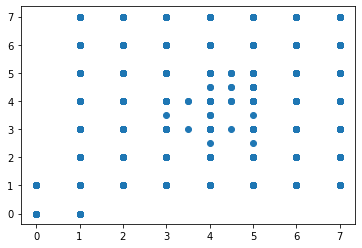

In [98]:
#let's look at all responses vs retests

plt.scatter(df_merge['coded_response'], 
            df_merge['coded_response_retest'])

Text(0.5, 1.0, 'Test/Resest for item #2: "I plan tasks carefully."\nrval=0.886')

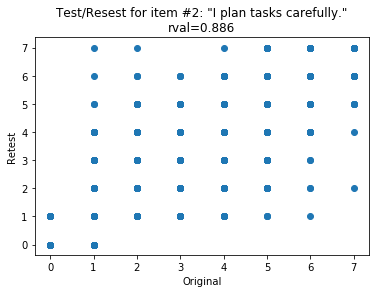

In [99]:
#let's look at responses for a given question

#select which question
item_num = 2

#selection indices that have that question
inds = df_merge['item_num'] == item_num

#get the text of the question itself -- only need the first row
#since all the rows have the same text 
item_text = df_merge[inds]['item_text'][0]

#get the responses for different subjects to the question
#both the original response ...
orig_resp = df_merge[inds]['coded_response']
#... and the retest response
retest_resp = df_merge[inds]['coded_response_retest']

#find the correlation of the responses across subjects
rval = stats.pearsonr(orig_resp, retest_resp)[0]

#and plot it
plt.scatter(orig_resp, retest_resp)
plt.xlabel('Original')
plt.ylabel('Retest')
plt.title('Test/Resest for item #%d: "%s"\nrval=%.3f' % 
                 (item_num, item_text, rval))
    
#actually it looks like a mess in the plot, but mostly the subjects 
#are pretty reliable numerically (rval of >.8)

In [100]:
#ok now let's do this for *all* surveys at once

#lets subset the columns so we're only working with stuff we want
df_merge_ss = df_merge[['worker', 'item_num', 'item_text',
                        'coded_response', 'coded_response_retest']]

df_merge_ss

,worker,item_num,item_text,coded_response,coded_response_retest
0,s005,2,I plan tasks carefully.,2.0,1.0
1,s005,3,I do things without thinking.,1.0,1.0
2,s005,4,I make-up my mind quickly.,3.0,3.0
3,s005,5,I am happy-go-lucky.,2.0,3.0
4,s005,6,I don't pay attention.,1.0,1.0
...,...,...,...,...,...
88567,s556,56,"Before making up my mind, I consider all the a...",2.0,2.0
88568,s556,57,I would enjoy fast driving.,3.0,3.0
88569,s556,58,"When I am very happy, I feel like it is ok to ...",3.0,2.0
88570,s556,59,Sometimes I do impulsive things that I later r...,3.0,3.0


In [101]:
#now, let's produce a dataframe whose rows are questions and whose columns
#represent the correlations between test and retest for that question

#first, group by question
df_group = df_merge_ss.groupby(by=['item_num'])

#now, we'll aggregate the grouped object with two custom functions
#the first aggregation fn is the thing that actually computes the correlation
f1 = lambda x: stats.pearsonr(x['coded_response'], x['coded_response_retest'])[0]
#the second aggregation fn is just getting the question test so it's clear what things mean
f2 = lambda x: x['item_text'].iloc[0]
#tell pandas that we want to assemble the result into two columns (correlation and text)
aggfunc = lambda x: pd.Series({'correlation': f1(x), 'item_text': f2(x)})
#do the grouping
df_agg = df_group.apply(aggfunc)
#what do we get?
df_agg
#cool!

,correlation,item_text
item_num,,
2,0.885652,I plan tasks carefully.
3,0.887999,I do things without thinking.
4,0.889585,I make-up my mind quickly.
5,0.868807,I am happy-go-lucky.
6,0.867228,I don't pay attention.
7,0.863797,I have 'racing' thoughts.
8,0.855114,I plan trips well ahead of time.
9,0.890813,I am self controlled.
10,0.870845,I concentrate easily.


Text(0.5, 1.0, 'Distribution of Reliabilities Across Subjects')

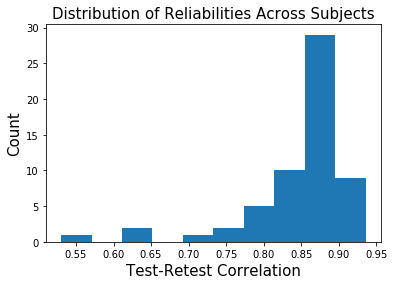

In [102]:
#let's summarize the reliabilities with a histogram 

plt.hist(df_agg['correlation'])
plt.xlabel('Test-Retest Correlation', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Distribution of Reliabilities Across Subjects', fontsize=15)

#ok so most surveys are pretty reliable across time

In [103]:
#let's sort by reliability

#let's use numpy to get the sorting since that shows how to combine the libraries
sorted_reliabilities = np.asarray(df_agg['correlation']).argsort()
df_agg_sort = df_agg.iloc[sorted_reliabilities]
df_agg_sort

#annoying since it's not printing the whole text

,correlation,item_text
item_num,,
58,0.530227,"When I am very happy, I feel like it is ok to ..."
60,0.625111,I am surprised at the things I do while in a g...
53,0.634708,Spending what I earn on pleasures today is bet...
54,0.707549,Often luck pays off better than hard work.
52,0.765239,"I keep working at difficult, uninteresting tas..."
51,0.765415,I think about the bad things that have happene...
59,0.774636,Sometimes I do impulsive things that I later r...
45,0.788675,Please select which of the two statements is m...
57,0.789515,There will always be time to catch up on my work.


In [104]:
#let's print the whole item text 
pd.options.display.max_colwidth = 100
df_agg_sort

,correlation,item_text
item_num,,
58,0.530227,"When I am very happy, I feel like it is ok to give in to cravings or overindulge."
60,0.625111,I am surprised at the things I do while in a great mood.
53,0.634708,Spending what I earn on pleasures today is better than saving for tomorrow's security.
54,0.707549,Often luck pays off better than hard work.
52,0.765239,"I keep working at difficult, uninteresting tasks if they will help me get ahead."
51,0.765415,I think about the bad things that have happened to me in the past.
59,0.774636,Sometimes I do impulsive things that I later regret.
45,0.788675,Please select which of the two statements is more true for you.
57,0.789515,There will always be time to catch up on my work.
